<a href="https://colab.research.google.com/github/aartijadhav25/aartijadhav25/blob/main/Cat_v_Dog_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

In [46]:
try:
  import kagglehub
except ImportError:
  !pip install kagglehub
path = kagglehub.dataset_download("ashfakyeafi/cat-dog-images-for-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ashfakyeafi/cat-dog-images-for-classification/versions/2


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

cp: cannot stat '/content/kaggle.json': No such file or directory


In [49]:
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
cat-dog-images-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
import shutil
import os

Sub-directory

In [52]:
source_dir = '/content/cat_dog'

cat_dir = '/content/cat_dog/cat'
dog_dir = '/content/cat_dog/dog'

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    if os.path.isfile(os.path.join(source_dir, filename)) and filename.startswith("cat"):
        shutil.move(os.path.join(source_dir, filename), os.path.join(cat_dir, filename))
    elif os.path.isfile(os.path.join(source_dir, filename)) and filename.startswith("dog"):
        shutil.move(os.path.join(source_dir, filename), os.path.join(dog_dir, filename))

In [54]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/cat_dog',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/cat_dog',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [55]:

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
val_dataset = val_dataset.map(process)

In [56]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [58]:
# Traning model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history = model.fit(train_dataset,epochs=10,validation_data=val_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.5654 - loss: 2.6348 - val_accuracy: 0.5978 - val_loss: 0.6634
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - accuracy: 0.6637 - loss: 0.6306 - val_accuracy: 0.6710 - val_loss: 0.5854
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.7395 - loss: 0.5434 - val_accuracy: 0.7372 - val_loss: 0.5243
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7897 - loss: 0.4523 - val_accuracy: 0.7442 - val_loss: 0.5352
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8215 - loss: 0.3963 - val_accuracy: 0.8124 - val_loss: 0.4197
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8588 - loss: 0.3303 - val_accuracy: 0.7752 - val_loss: 0.5210
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8911 - loss: 0.2561 - val_accuracy: 0.8074 - val_loss: 0.5145
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9261 - loss: 0.1825 - 

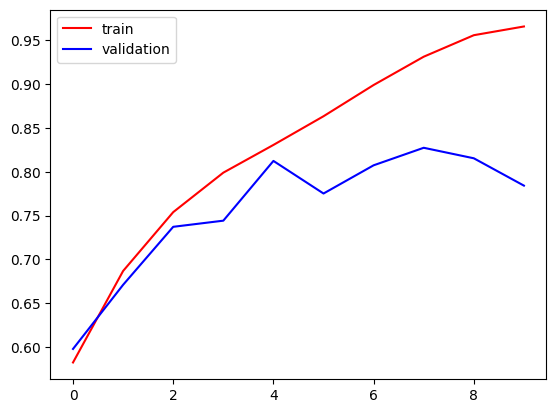

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='validation')
plt.legend()
plt.show()

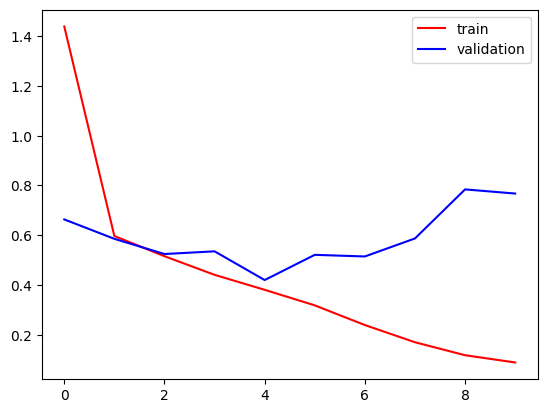

In [61]:
plt.plot(history.history['loss'],color ='red',label ='train')
plt.plot(history.history['val_loss'],color ='blue',label ='validation')
plt.legend()
plt.show()

In [62]:
import cv2

In [63]:
test_img = cv2.imread('/content/download (2).jpg')

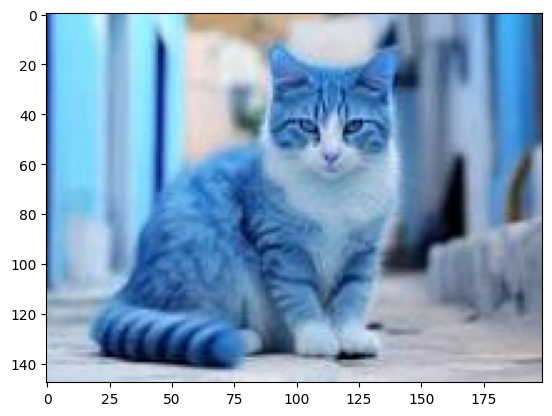

In [64]:
plt.imshow(test_img)
plt.show()

In [65]:
test_img.shape

(148, 199, 3)

In [66]:
test_img = cv2.resize(test_img,(256,256))

In [67]:
test_input = test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


array([[0.]], dtype=float32)